# Quatnum classification

In [13]:
#import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np
from sklearn.utils import shuffle

from quantum_classification import *
from structure_effect_on_trainability import *

<font size="3">
In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by three parts: embedding part, ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit. 
    There are 3 types of embedding circuits:
    - Tensor Product Embedding (TPE): embedding circuit is a tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Embedding (HEE): embedding circuit is a tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Classically Hard Embedding (CHE): embedding circuit that is hard to simulate on classically.
- ansatz part: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): ansatz circuit is a tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): ansatz circuit is a tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)
</font>

## 1. Train OR data

In [7]:
# OR
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([0, 1, 1, 1])
x_test, y_test = x_train, y_train

### test

In [8]:
# settings
nqubits = 2; nlayers = 2; embedding_type = 'APE'; ansatz_type = 'SEA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

# optimize
test = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=200)

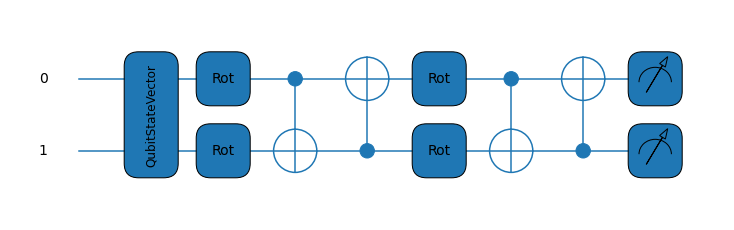

In [9]:
test.draw_circuit()

In [10]:
test.optimize()

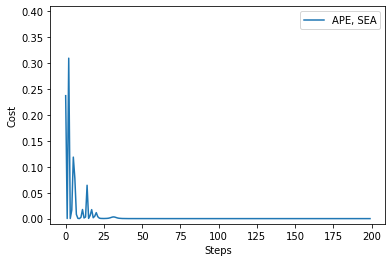

In [11]:
test.plot_cost()

In [12]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  3.333491206071272e-06


## dependence of trainability on the types of embedding, ansatz and cost function

### when cost_type is mse

In [4]:
nqubits = 2; nlayers_list = [2]; cost_type = 'MSE'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 300

optimized_cost_acc_mse, cost_all_mse = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, nlayers_list, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


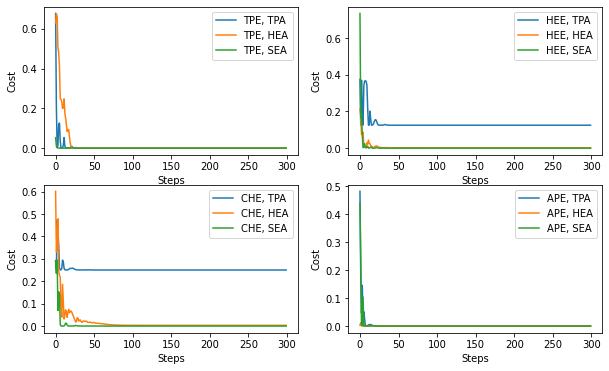

In [5]:
plot_cost(cost_all_mse)

`TPE` and `APE` seems stablly train the parameters.

In `Subtleties in the trainability of quantum machine learning models`
> Particularly, we here show that the CHE scheme can lead to poor performance for some standard benchmarking test.

In [6]:
sort_cost_acc(cost_type, optimized_cost_acc_mse)

MSE
embedding_type: APE, ansatz_type: SEA: cost 9.287184301806036e-08
embedding_type: APE, ansatz_type: HEA: cost 1.3941793259002672e-07
embedding_type: TPE, ansatz_type: SEA: cost 1.3847711082154755e-06
embedding_type: TPE, ansatz_type: HEA: cost 2.143269656743793e-06
embedding_type: HEE, ansatz_type: SEA: cost 3.2801128526349907e-06
embedding_type: CHE, ansatz_type: SEA: cost 3.4400571779864667e-06
embedding_type: APE, ansatz_type: TPA: cost 6.128239299940281e-06
embedding_type: TPE, ansatz_type: TPA: cost 2.1256636600752295e-05
embedding_type: HEE, ansatz_type: HEA: cost 0.0018232651268833373
embedding_type: CHE, ansatz_type: HEA: cost 0.0032500548745001945
embedding_type: HEE, ansatz_type: TPA: cost 0.12500133014702905
embedding_type: CHE, ansatz_type: TPA: cost 0.25008549261358054
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: S

### when cost_type is cross entropy

In [70]:
nqubits = 2; nlayers_list = [2]; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 300

optimized_cost_acc_log, cost_all_log = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, nlayers_list, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


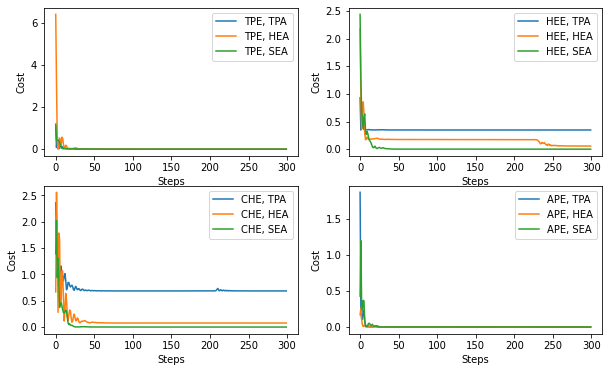

In [71]:
plot_cost(cost_all_log)

In [72]:
sort_cost_acc(cost_type, optimized_cost_acc_log)

LOG
embedding_type: APE, ansatz_type: HEA: cost 2.5734280464509664e-05
embedding_type: APE, ansatz_type: SEA: cost 5.467147350708096e-05
embedding_type: TPE, ansatz_type: SEA: cost 0.0005669660386509214
embedding_type: HEE, ansatz_type: SEA: cost 0.0007063131927517226
embedding_type: TPE, ansatz_type: HEA: cost 0.0007170445703100117
embedding_type: CHE, ansatz_type: SEA: cost 0.0007231933954715363
embedding_type: APE, ansatz_type: TPA: cost 0.0015703653361064385
embedding_type: TPE, ansatz_type: TPA: cost 0.003971584779388759
embedding_type: HEE, ansatz_type: HEA: cost 0.05674412787898418
embedding_type: CHE, ansatz_type: HEA: cost 0.07750919849475867
embedding_type: HEE, ansatz_type: TPA: cost 0.3472858950607817
embedding_type: CHE, ansatz_type: TPA: cost 0.686788093704583
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA: accuracy